##### Importing Sklearn Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For conversion of Categorical values to Numerical
from sklearn.preprocessing import LabelEncoder

# For splitting and standardizing the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For classification problem
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# For evaluation of Classification model
from sklearn import metrics

# For warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##### Importng the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print('df Shape = ', df.shape)
df.head(10)

df Shape =  (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


##### DATA CLEANING PROCESS

In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female': 0})

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


##### DATA VISUALIZATION

##### The correlation map is used for knowing the important features / columns.
##### In the purchased row, Gender column has value is negative. 
##### So, for prediction purpose, the Gender column can be ignored.

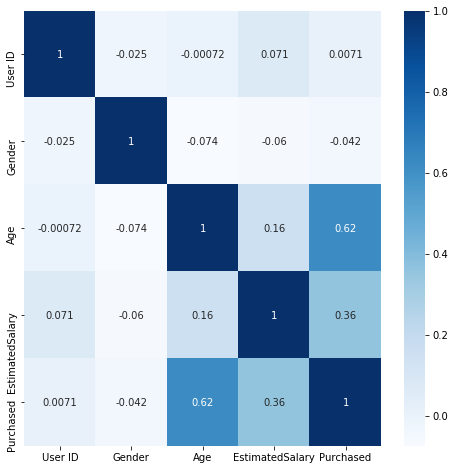

In [7]:
plt.figure(figsize=(8,8))
g = sns.heatmap(df.corr(), annot = True, cmap = "Blues")

##### Plot between EstimatedSalary and User ID

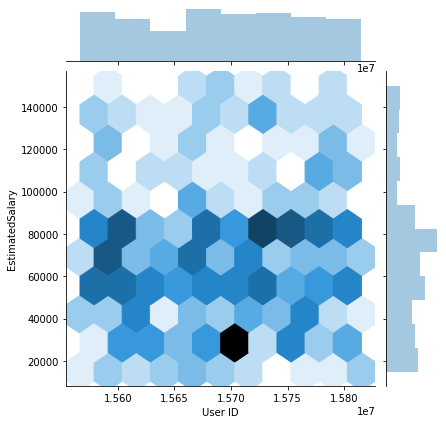

In [8]:
sns.jointplot(x="User ID", y="EstimatedSalary",kind = 'hex', data=df);

##### Plot between Purchased and User ID columns

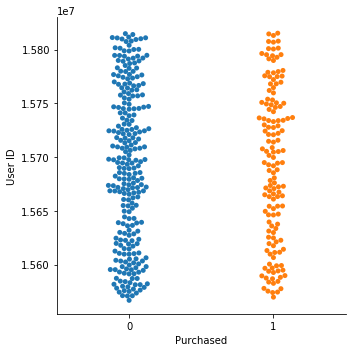

In [10]:
sns.catplot(x = 'Purchased', y = 'User ID', kind = 'swarm', data = df)

##### Plot between Purchased column and estimatedSalary column

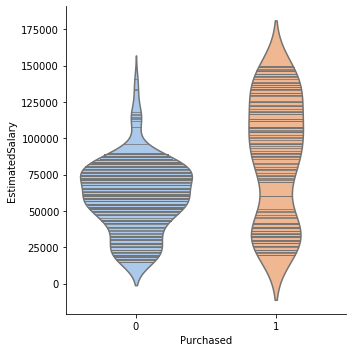

In [11]:
sns.catplot(x = 'Purchased', y = 'EstimatedSalary', kind = 'violin', data = df, inner="stick", split=True, palette="pastel")

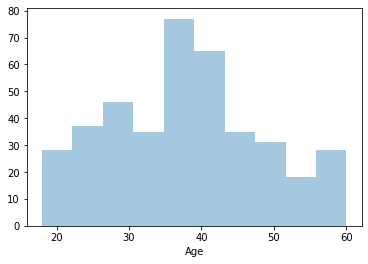

In [12]:
sns.distplot(df['Age'], kde = False)

##### Plot for all the columns in the dataset

<Figure size 576x576 with 0 Axes>

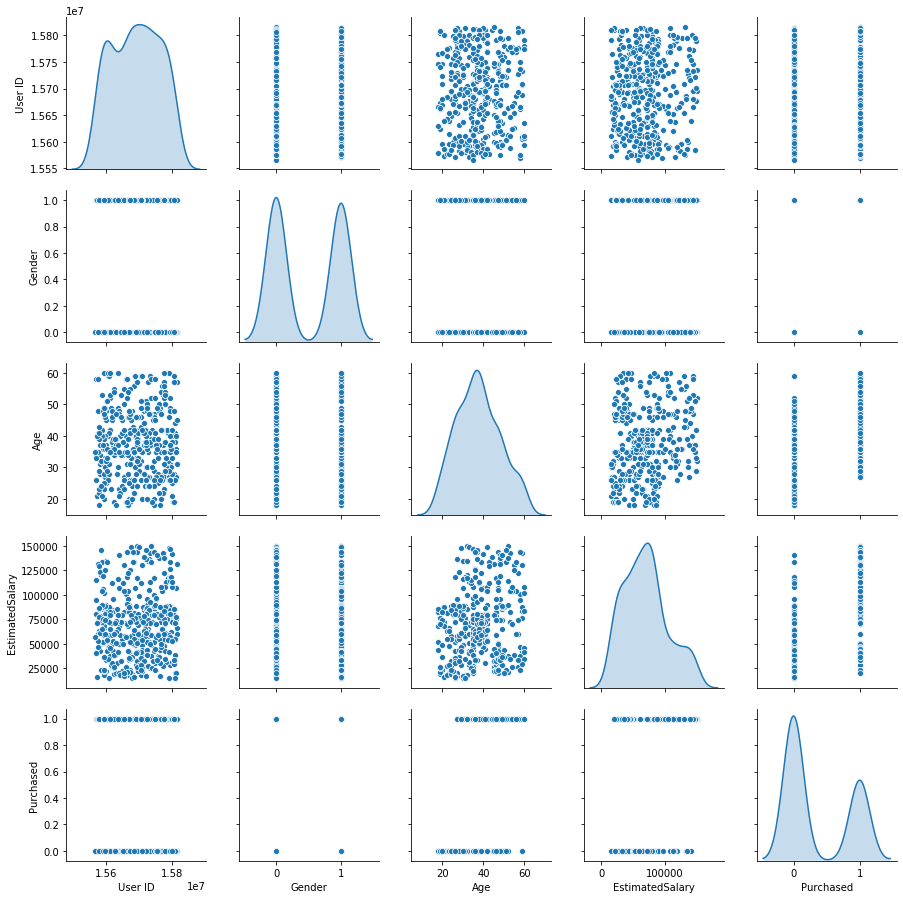

In [13]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette="Set2", diag_kind="kde", height=2.5)

##### Now from the df dataset, independent columns and dependent column are separated.
##### Independent columns are named as 'X'
##### Deoendent column is named as 'y'

In [14]:
y = np.array(df['Purchased'])
y = y.reshape(-1,1)

In [16]:
X = df.iloc[:, df.columns != 'Purchased']
X.head(10)

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
5,15728773,1,27,58000
6,15598044,0,27,84000
7,15694829,0,32,150000
8,15600575,1,25,33000
9,15727311,0,35,65000


##### Splitting of dataset is done using train_test_split method
##### Training and testing set is in the ratio 7 : 3
##### 70 % for training and 30 % for testing of the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [18]:
X_train.shape, X_test.shape

((120, 4), (280, 4))

##### Standardizing of the 'X' dataset

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### 5 Classification methods are used i.z, Naive bayes, Random forest, Decision tree, Stochastic gradient descent, KNeighbors classifier.
##### Using RandomizedSearchCV method, best parameters are choosen for the models for better accuracy.

##### Random Forest Classifier

In [21]:
random_grid_rfc = {'n_estimators': [10,30,50,100],
                  'criterion': ['gini', 'entropy'],
                  'min_samples_split': [2,4,6],
                  'max_features': ['auto', 'sqrt', 'log2']}

In [24]:
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid_rfc, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [26]:
rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [27]:
rfc_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'max_features': 'auto',
 'criterion': 'gini'}

In [28]:
rfc_random.best_score_

0.9166666666666666

In [29]:
rfc_score = round((rfc_random.best_score_)*100,2)
rfc_score

91.67

##### Decision Tree Classifier

In [30]:
random_grid_dtc = {'criterion': ['gini', 'entropy'],
                  'min_samples_split': [2,4,6],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'splitter': ['best', 'random'],
                   'min_samples_leaf': [1,3,5]}

In [31]:
dtc = DecisionTreeClassifier()
dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid_dtc, cv = 5, verbose = 3, n_iter = 100, random_state = 42, n_jobs= -1 )

In [32]:
dtc_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [35]:
dtc_random.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'criterion': 'entropy'}

In [36]:
dtc_random.best_score_

0.8916666666666667

In [37]:
dtc_score = round((dtc_random.best_score_)*100, 2)
dtc_score

89.17

##### Stochastic Gradient Descent 

In [38]:
random_grid_sgd = {'alpha': [0.001,0.01,0.1,0.0001],
                  'penalty': ['l2','l1','elasticnet'],
                   'max_iter': [1000,900,1100],
                  'epsilon': [0.1,0.01,1,0]}

In [39]:
sgd = SGDClassifier()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid_sgd, cv = 5, verbose = 2, n_iter = 100, random_state = 42, n_jobs= -1 )

In [40]:
sgd_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distri

In [41]:
sgd_random.best_params_

{'penalty': 'l2', 'max_iter': 1000, 'epsilon': 1, 'alpha': 0.001}

In [42]:
sgd_random.best_score_

0.8583333333333333

In [43]:
sgd_score = round((sgd_random.best_score_)*100, 2)
sgd_score

85.83

##### KNeighbors Classifier

In [44]:
random_grid_knc = {'n_neighbors': [5,8,10],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2],
                  'leaf_size': [30,40,50]}

In [45]:
knc = KNeighborsClassifier()
knc_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid_sgd, cv = 5, verbose = 2, n_iter = 100, random_state = 42, n_jobs= -1 )

In [47]:
knc_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distri

In [48]:
knc_random.best_params_

{'penalty': 'l1', 'max_iter': 900, 'epsilon': 0.1, 'alpha': 0.001}

In [49]:
knc_random.best_score_

0.875

In [50]:
knc_score = round((knc_random.best_score_)*100, 2)
knc_score

87.5

##### Naive Bayas

In [51]:
nb = GaussianNB()

In [52]:
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
nb.score(X_test, y_test)

0.8964285714285715

In [54]:
nb_score = round((nb.score(X_test, y_test))*100, 2)
nb_score

89.64

##### Dataframe consisting of model and its score

In [55]:
models = pd.DataFrame({ 
    'Model': ['Naive Bayes', 'RandomForest Classifier', 'DecisionTree Classifier',
             'KNeighborsClassifier', 'Stochastic Gradient Descent'],
    'Score': [nb_score, rfc_score, dtc_score, 
              knc_score, sgd_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,RandomForest Classifier,91.67
0,Naive Bayes,89.64
2,DecisionTree Classifier,89.17
3,KNeighborsClassifier,87.50
4,Stochastic Gradient Descent,85.83


##### From the above table Random Forest classifier is best suited for prediction

##### y_predicted is calculated

In [56]:
y_predicted = rfc_random.predict(X_test)
y_predicted

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

##### Confusion Matrix to describe the performance of the model

In [57]:
cm = metrics.confusion_matrix(y_test, y_predicted)
cm

array([[161,  21],
       [  9,  89]], dtype=int64)

##### Plot for y_predicted

Text(0.5, 0, 'y_predicted')

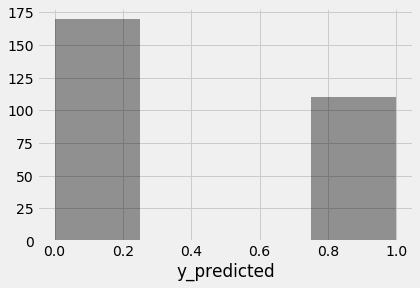

In [65]:
sns.distplot(y_predicted, kde = False, color = 'black')
plt.xlabel('y_predicted')

##### Plot between True value and predicted value

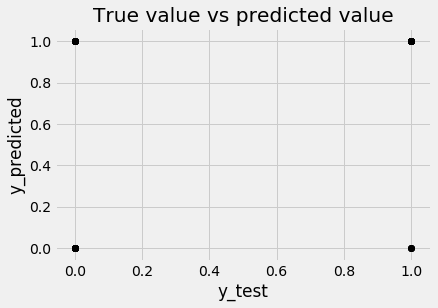

In [60]:
plt.scatter(y_test, y_predicted, color = 'black')

plt.ylabel('y_predicted')
plt.xlabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')

##### Calculation of the Score
##### Receiver Operating Characteristic Curve (roc_auc) 
##### Mean Absolute Error (MAE)
##### Mean Squared Error (MSE)

In [61]:
print('Roc_auc_score : ', round(metrics.roc_auc_score(y_test, y_predicted)*100, 2))
print('MAE score : ', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE score : ', metrics.mean_squared_error(y_test, y_predicted))

Roc_auc_score :  89.64
MAE score :  0.10714285714285714
MSE score :  0.10714285714285714
